# Lab 3. Data Mining in Python
### Main objectives
After successful completion of the lab work students will be able to:
-	Build data mining models and assess its accuracy in Python
-	Apply these models for real life marketing campaigns
-	Analyze profitability of applying data mining results

### TASK LIST

1.	Build data mining model predicting bike buyers by analyzing historic customer purchasing data.
2.	Assess accuracy of the mining model and compare it with ideal model and random guess model
3.	Analyze probability thresholds that should be accepted in order to maximize profits of the direct marketing campaign.
4.	Select potential customers for a targeted direct mail marketing campaign

In this demo, you will see how to use the Python to:
- Clean a data source and prepare it for use in data modeling
- Partition a data source into training and testing data
- Build a data mining model
- Verify the overall accuracy of the data mining model
- Create and model a scenario using the data mining model
- Apply the scenario results to a separate data set

In [2]:
# import pandas library
import pandas as pd

In [3]:
# read the data from excel source
potential_df = pd.read_excel('Historic Customer Data.xls', sheet_name='Potential Customers', index_col='CustomerKey')
historical_df = pd.read_excel('Historic Customer Data.xls', sheet_name='Historical Customers', index_col='CustomerKey')

In [4]:
# see the data and its structure
potential_df.head()

,First Name,Last Name,Birth Date,Marital Status,Gender,Email,Income,Children,Education,Occupation,HomeOwner,Number of cars,CommuteDistance,Age
CustomerKey,,,,,,,,,,,,,,
11000,Jon,Yang,1966-04-08,Married,Male,jon24@adventure-works.com,90000,2,Bachelors,Professional,Yes,0,1-2 Miles,40
11001,Eugene,Huang,1965-05-14,Single,Male,eugene10@adventure-works.com,60000,3,Bachelors,Professional,No,1,0-1 Miles,41
11002,Ruben,Torres,1965-08-12,Married,Male,ruben35@adventure-works.com,60000,3,Bachelors,Professional,Yes,1,2-5 Miles,41
11003,Christy,Zhu,1968-02-15,Single,Female,christy12@adventure-works.com,70000,0,Bachelors,Professional,No,1,5-10 Miles,38
11004,Elizabeth,Johnson,1968-08-08,Single,Female,elizabeth5@adventure-works.com,80000,5,Bachelors,Professional,Yes,4,1-2 Miles,38


In [5]:
historical_df.head()

,Birth Date,Marital Status,Gender,Income,Children,Education,Occupation,HomeOwner,Number of cars,CommuteDistance,Age,BikeBuyer
CustomerKey,,,,,,,,,,,,
11000,1966-04-08,Married,Male,90000,2,Bachelors,Professional,Yes,0,1-2 Miles,40,Yes
11001,1965-05-14,Single,Male,60000,3,Bachelors,Professional,No,1,0-1 Miles,41,Yes
29004,1948-11-24,Married,Male,70000,4,Bachelors,Management,Yes,2,10+ Miles,57,Yes
25562,1979-10-09,Married,Female,20000,0,Bachelors,Clerical,Yes,0,0-1 Miles,27,Yes
18839,1955-04-13,Married,Male,80000,3,Partial College,Professional,Yes,1,1-2 Miles,51,Yes


In [6]:
print(potential_df.shape)
print(historical_df.shape)

(18484, 14)
(5000, 12)


## Let's analyze historical data and clean it

In [7]:
historical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 11000 to 19723
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Birth Date       5000 non-null   datetime64[ns]
 1   Marital Status   5000 non-null   object        
 2   Gender           5000 non-null   object        
 3   Income           5000 non-null   int64         
 4   Children         5000 non-null   int64         
 5   Education        5000 non-null   object        
 6   Occupation       5000 non-null   object        
 7   HomeOwner        5000 non-null   object        
 8   Number of cars   5000 non-null   int64         
 9   CommuteDistance  5000 non-null   object        
 10  Age              5000 non-null   int64         
 11  BikeBuyer        5000 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 507.8+ KB


In [8]:
historical_df.columns

Index(['Birth Date', 'Marital Status', 'Gender', 'Income', 'Children',
       'Education', 'Occupation', 'HomeOwner', 'Number of cars',
       'CommuteDistance', 'Age', 'BikeBuyer'],
      dtype='object')

In [9]:
potential_df.columns

Index(['First Name', 'Last Name', 'Birth Date', 'Marital Status', 'Gender',
       'Email', 'Income', 'Children', 'Education', 'Occupation', 'HomeOwner',
       'Number of cars', 'CommuteDistance', 'Age'],
      dtype='object')

In [10]:
# describe data statistics
historical_df.describe()

,Income,Children,Number of cars,Age
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,58214.000000,1.884200,1.510200,44.234400
std,32541.081549,1.632827,1.135145,11.300487
min,10000.000000,0.000000,0.000000,25.000000
25%,30000.000000,0.000000,1.000000,36.000000
50%,60000.000000,2.000000,2.000000,42.000000
75%,80000.000000,3.000000,2.000000,52.000000
max,170000.000000,12.000000,4.000000,95.000000


In [11]:
# find null items from dataset
historical_df.isnull().sum()

Birth Date         0
Marital Status     0
Gender             0
Income             0
Children           0
Education          0
Occupation         0
HomeOwner          0
Number of cars     0
CommuteDistance    0
Age                0
BikeBuyer          0
dtype: int64

In [12]:
# find duplicates 
historical_df.index[historical_df.index.duplicated()].nunique()

0

In [13]:
# Drop useless columns for preidctions. How do you think, 
# why we don't need birth date?
historical_df.drop('Birth Date', axis='columns', inplace=True)
potential_df.drop('Birth Date', axis='columns', inplace=True)
potential_df.drop('First Name', axis='columns', inplace=True)
potential_df.drop('Last Name', axis='columns', inplace=True)
potential_df.drop('Email', axis='columns', inplace=True)
print(potential_df.shape)
print(historical_df.shape)

(18484, 10)
(5000, 11)


In [14]:
historical_df.head()

,Marital Status,Gender,Income,Children,Education,Occupation,HomeOwner,Number of cars,CommuteDistance,Age,BikeBuyer
CustomerKey,,,,,,,,,,,
11000,Married,Male,90000,2,Bachelors,Professional,Yes,0,1-2 Miles,40,Yes
11001,Single,Male,60000,3,Bachelors,Professional,No,1,0-1 Miles,41,Yes
29004,Married,Male,70000,4,Bachelors,Management,Yes,2,10+ Miles,57,Yes
25562,Married,Female,20000,0,Bachelors,Clerical,Yes,0,0-1 Miles,27,Yes
18839,Married,Male,80000,3,Partial College,Professional,Yes,1,1-2 Miles,51,Yes


In [15]:
potential_df.head()

,Marital Status,Gender,Income,Children,Education,Occupation,HomeOwner,Number of cars,CommuteDistance,Age
CustomerKey,,,,,,,,,,
11000,Married,Male,90000,2,Bachelors,Professional,Yes,0,1-2 Miles,40
11001,Single,Male,60000,3,Bachelors,Professional,No,1,0-1 Miles,41
11002,Married,Male,60000,3,Bachelors,Professional,Yes,1,2-5 Miles,41
11003,Single,Female,70000,0,Bachelors,Professional,No,1,5-10 Miles,38
11004,Single,Female,80000,5,Bachelors,Professional,Yes,4,1-2 Miles,38


In [16]:
# import libraries for plots
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [21]:
historical_df.columns

Index(['Marital Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'HomeOwner', 'Number of cars', 'CommuteDistance', 'Age',
       'BikeBuyer'],
      dtype='object')

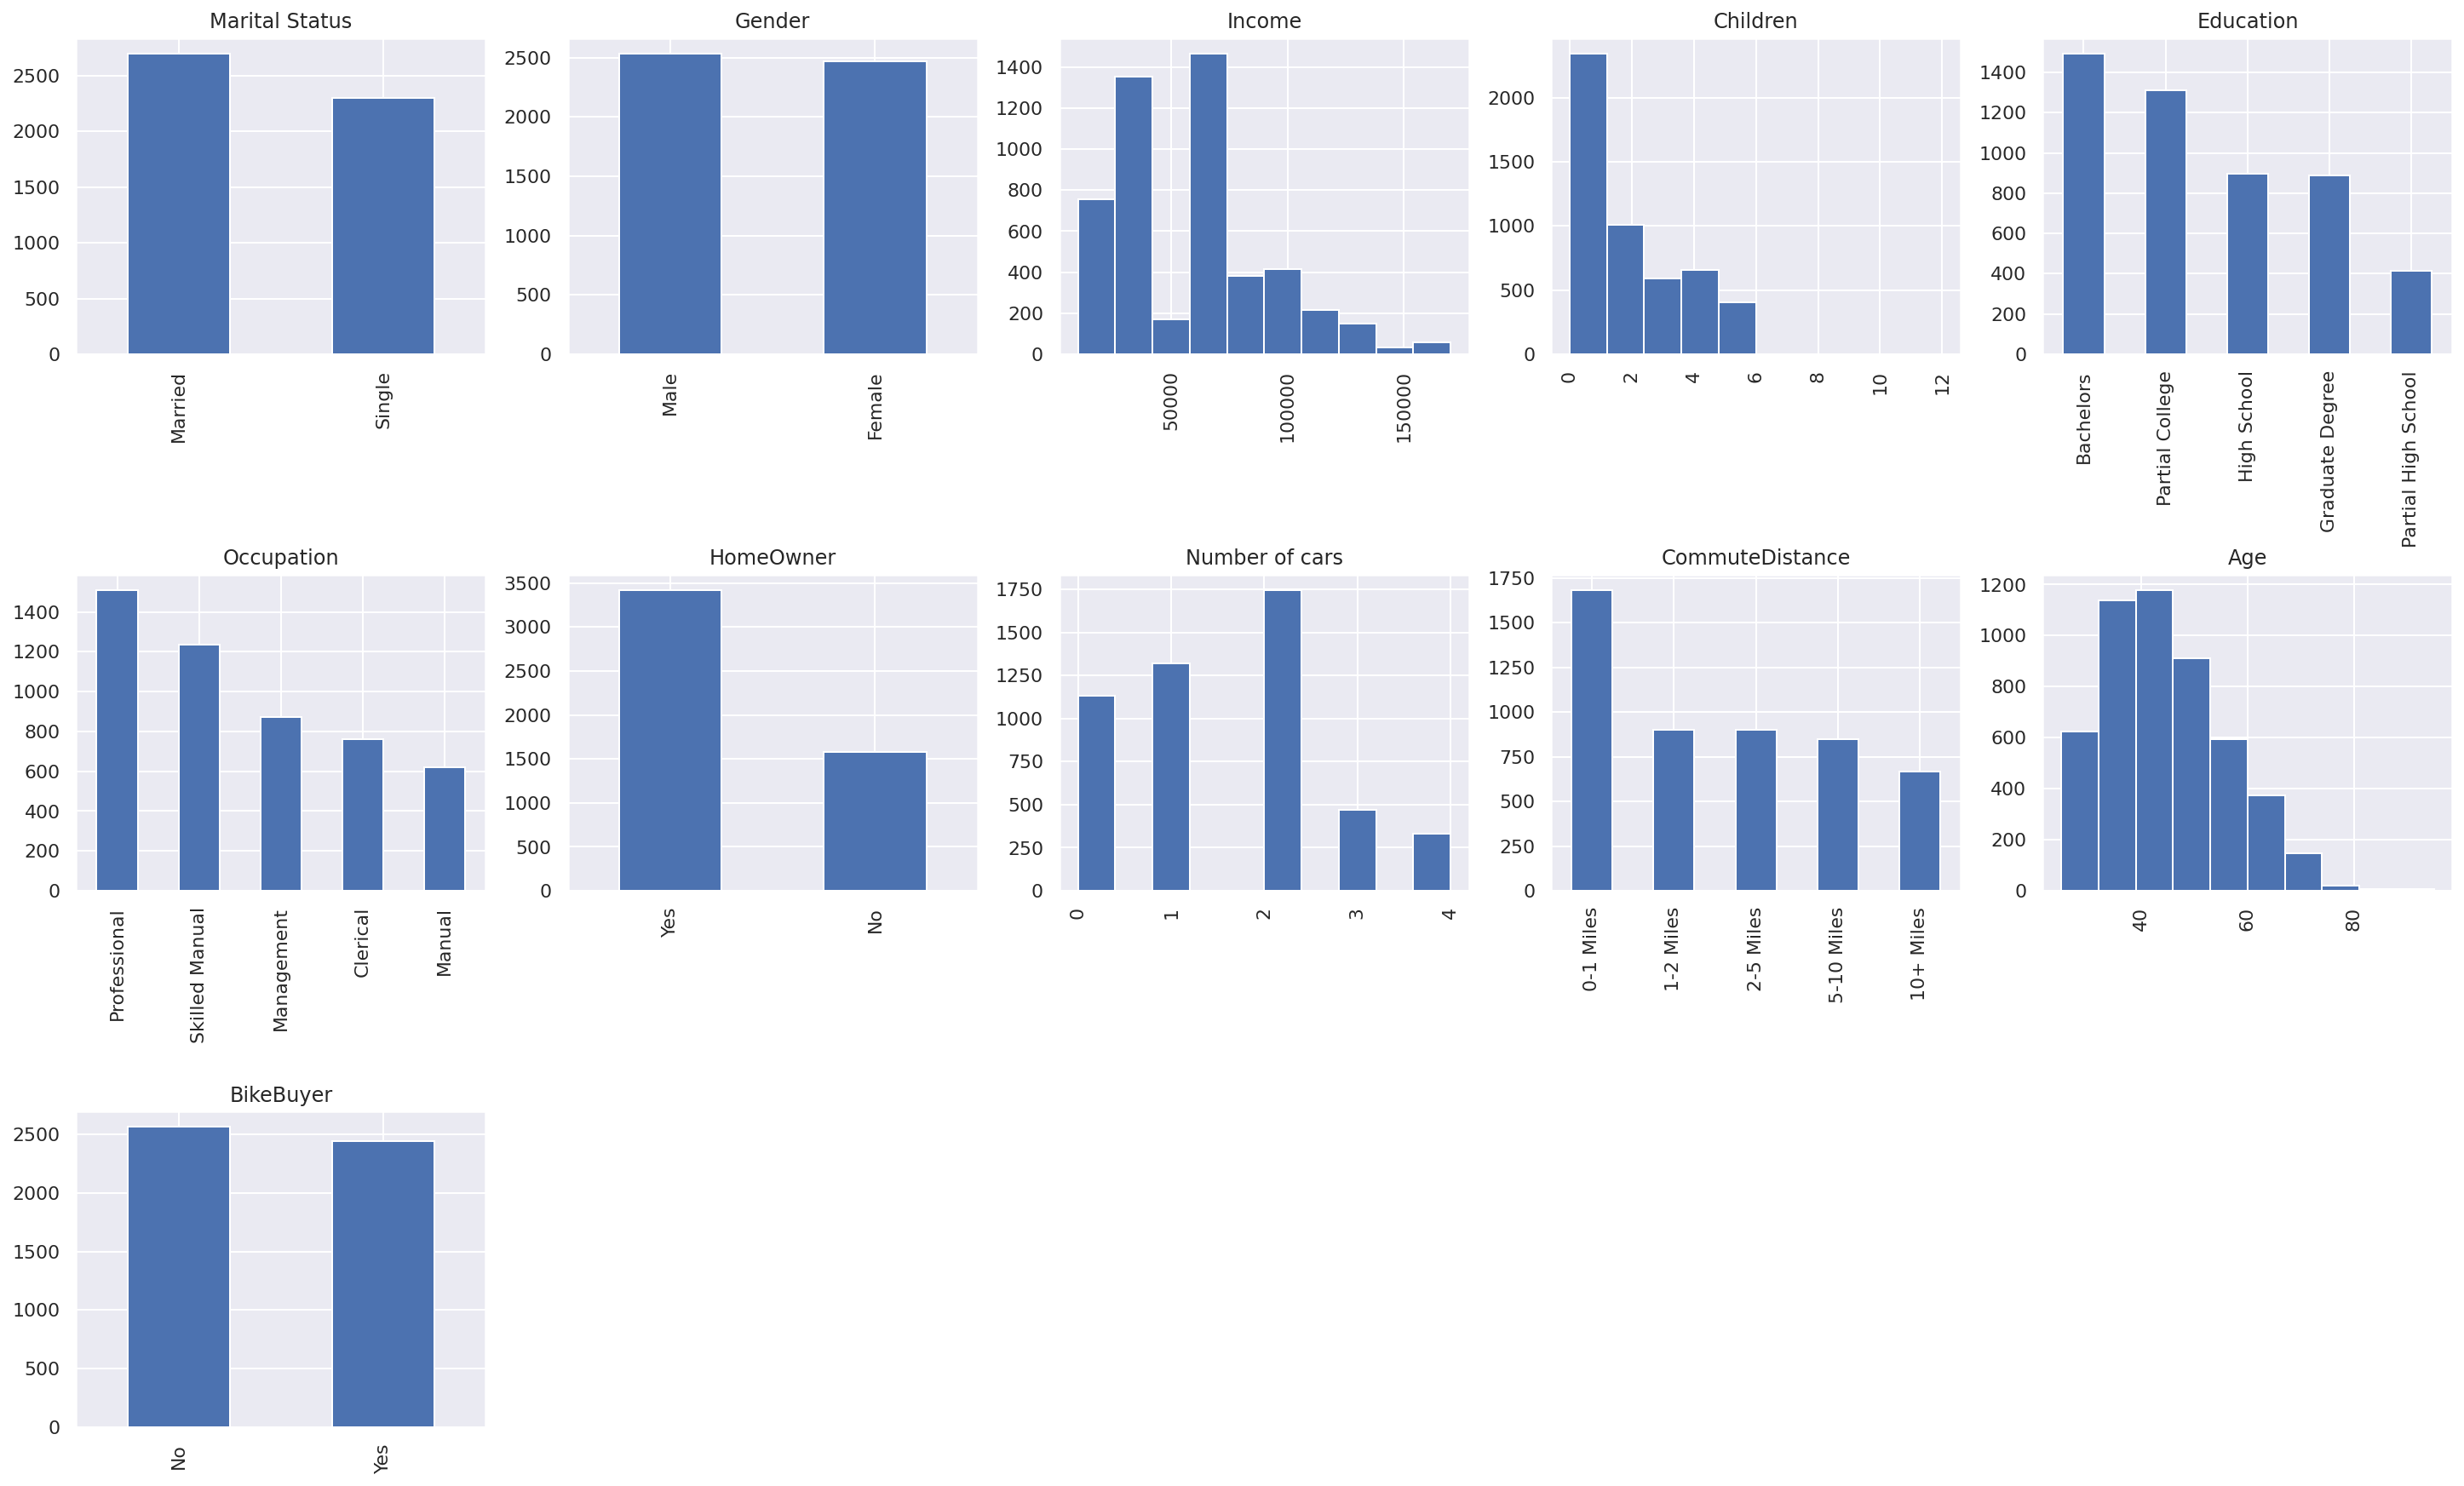

In [18]:
fig = plt.figure(figsize=(25, 15))
cols = 5
rows = np.ceil(float(historical_df.shape[1]) / cols)
for i, column in enumerate(historical_df.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if historical_df.dtypes[column] == np.object:
        historical_df[column].value_counts().plot(kind="bar", axes=ax)
    else:
        historical_df[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [17]:
# choose categorical and continuous features from data

categorical_columns = [c for c in historical_df.columns 
                       if historical_df[c].dtype.name == 'object']
numerical_columns = [c for c in historical_df.columns 
                     if historical_df[c].dtype.name != 'object']

print('categorical_columns:', categorical_columns)
print('numerical_columns:', numerical_columns)
categorical_columns = categorical_columns[:-1]
print(categorical_columns)

categorical_columns: ['Marital Status', 'Gender', 'Education', 'Occupation', 'HomeOwner', 'CommuteDistance', 'BikeBuyer']
numerical_columns: ['Income', 'Children', 'Number of cars', 'Age']
['Marital Status', 'Gender', 'Education', 'Occupation', 'HomeOwner', 'CommuteDistance']


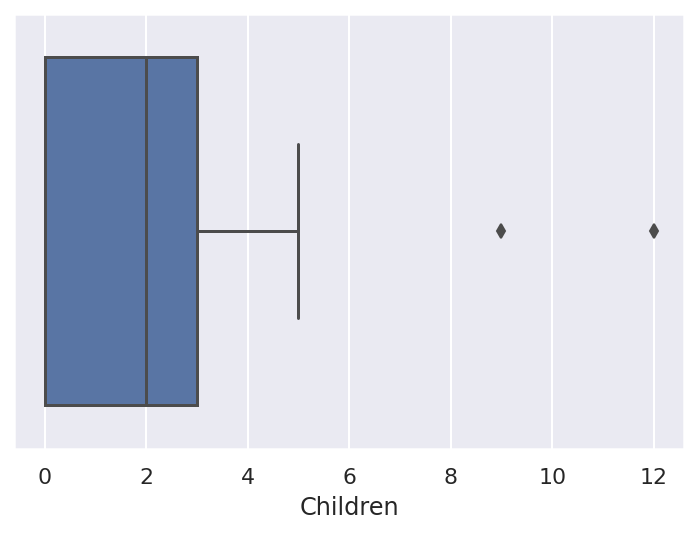

In [18]:
sns.boxplot(x="Children", data=historical_df);

How the boxplot works:

<img src='boxplot.png'>

In [19]:
historical_df['Children'].value_counts()

0     1357
2     1009
1      987
4      654
3      588
5      403
9        1
12       1
Name: Children, dtype: int64

In [20]:
# clean outliers
historical_df = historical_df[historical_df['Children']<6]

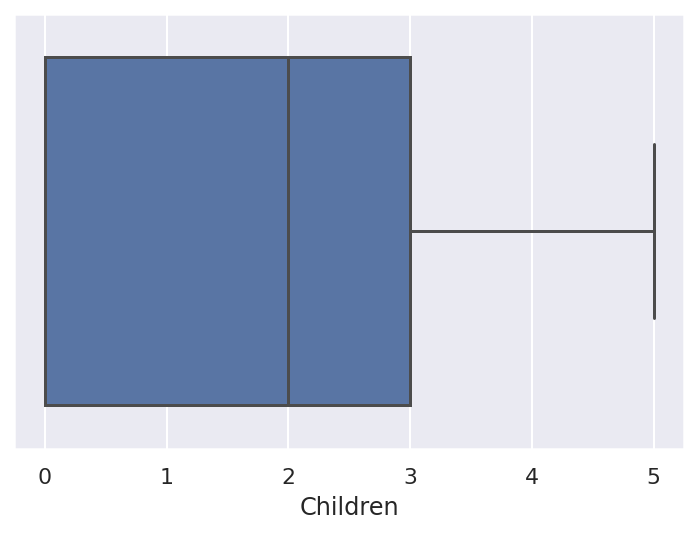

In [21]:
sns.boxplot(x="Children", data=historical_df);

<AxesSubplot:xlabel='Age'>

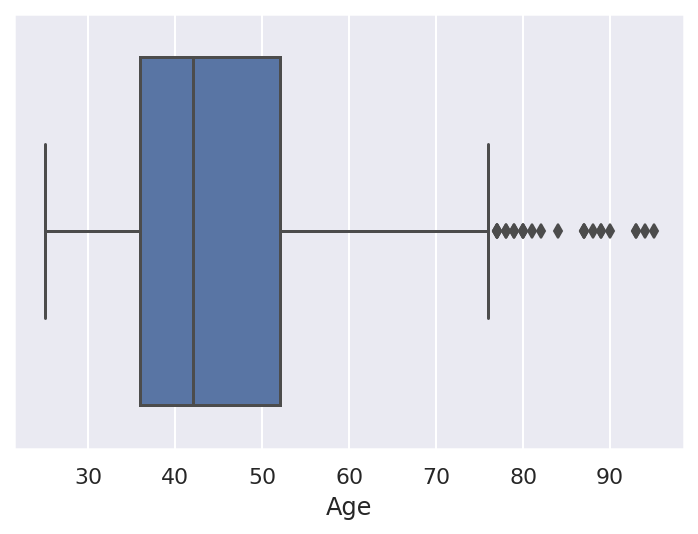

In [22]:
# same action for age
sns.boxplot(x="Age", data=historical_df)

In [23]:
# clean data for age column
historical_df = historical_df[historical_df['Age']<70]

<AxesSubplot:xlabel='Age'>

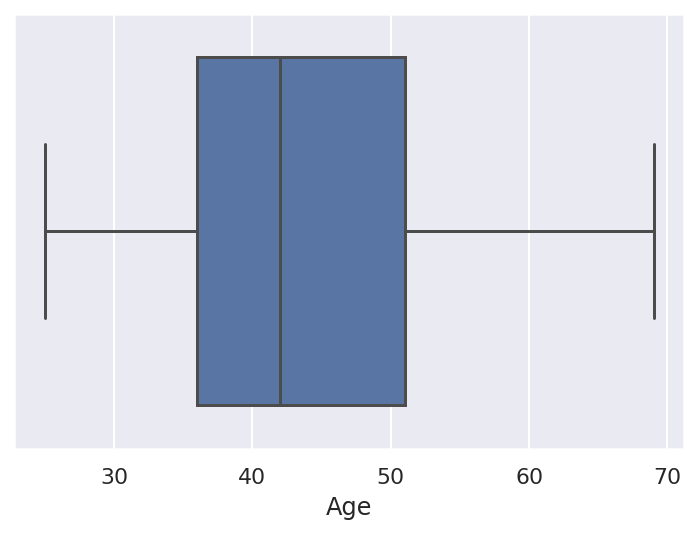

In [24]:
sns.boxplot(x="Age", data=historical_df)

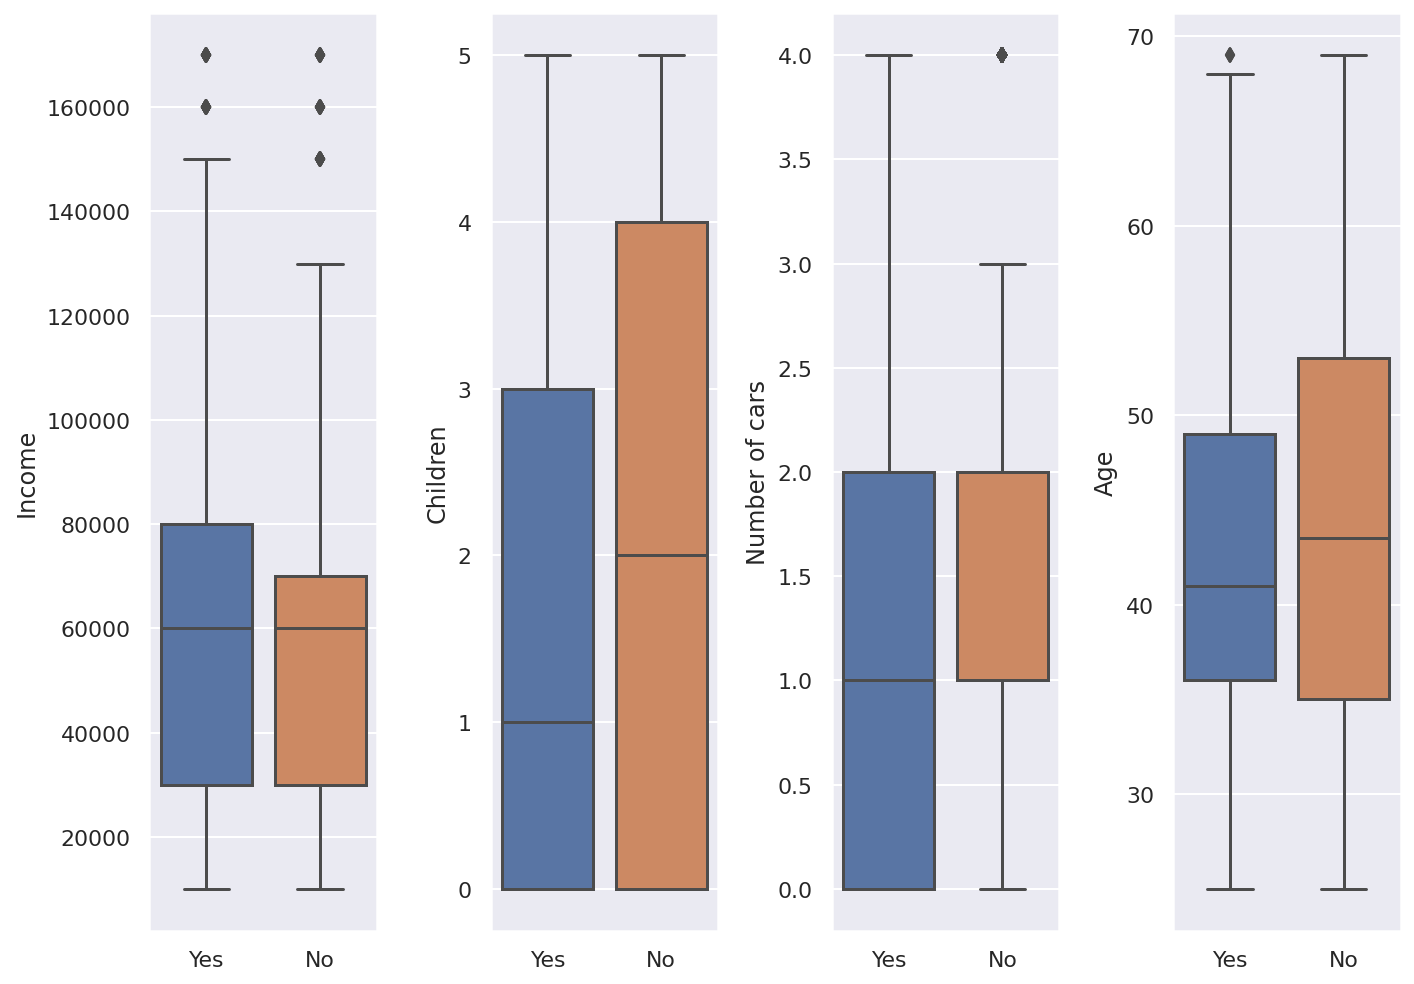

In [25]:
# plot boxplots for some continious features
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical_columns):
    ax = axes[idx % 4]
    sns.boxplot(x="BikeBuyer", y=feat, data=historical_df, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

In [26]:
# find dependency between education and target variable using crosstables
pd.crosstab(historical_df["Education"], historical_df["BikeBuyer"]).T

Education,Bachelors,Graduate Degree,High School,Partial College,Partial High School
BikeBuyer,,,,,
No,637,393,525,652,273
Yes,837,442,357,648,133


<AxesSubplot:xlabel='Gender', ylabel='count'>

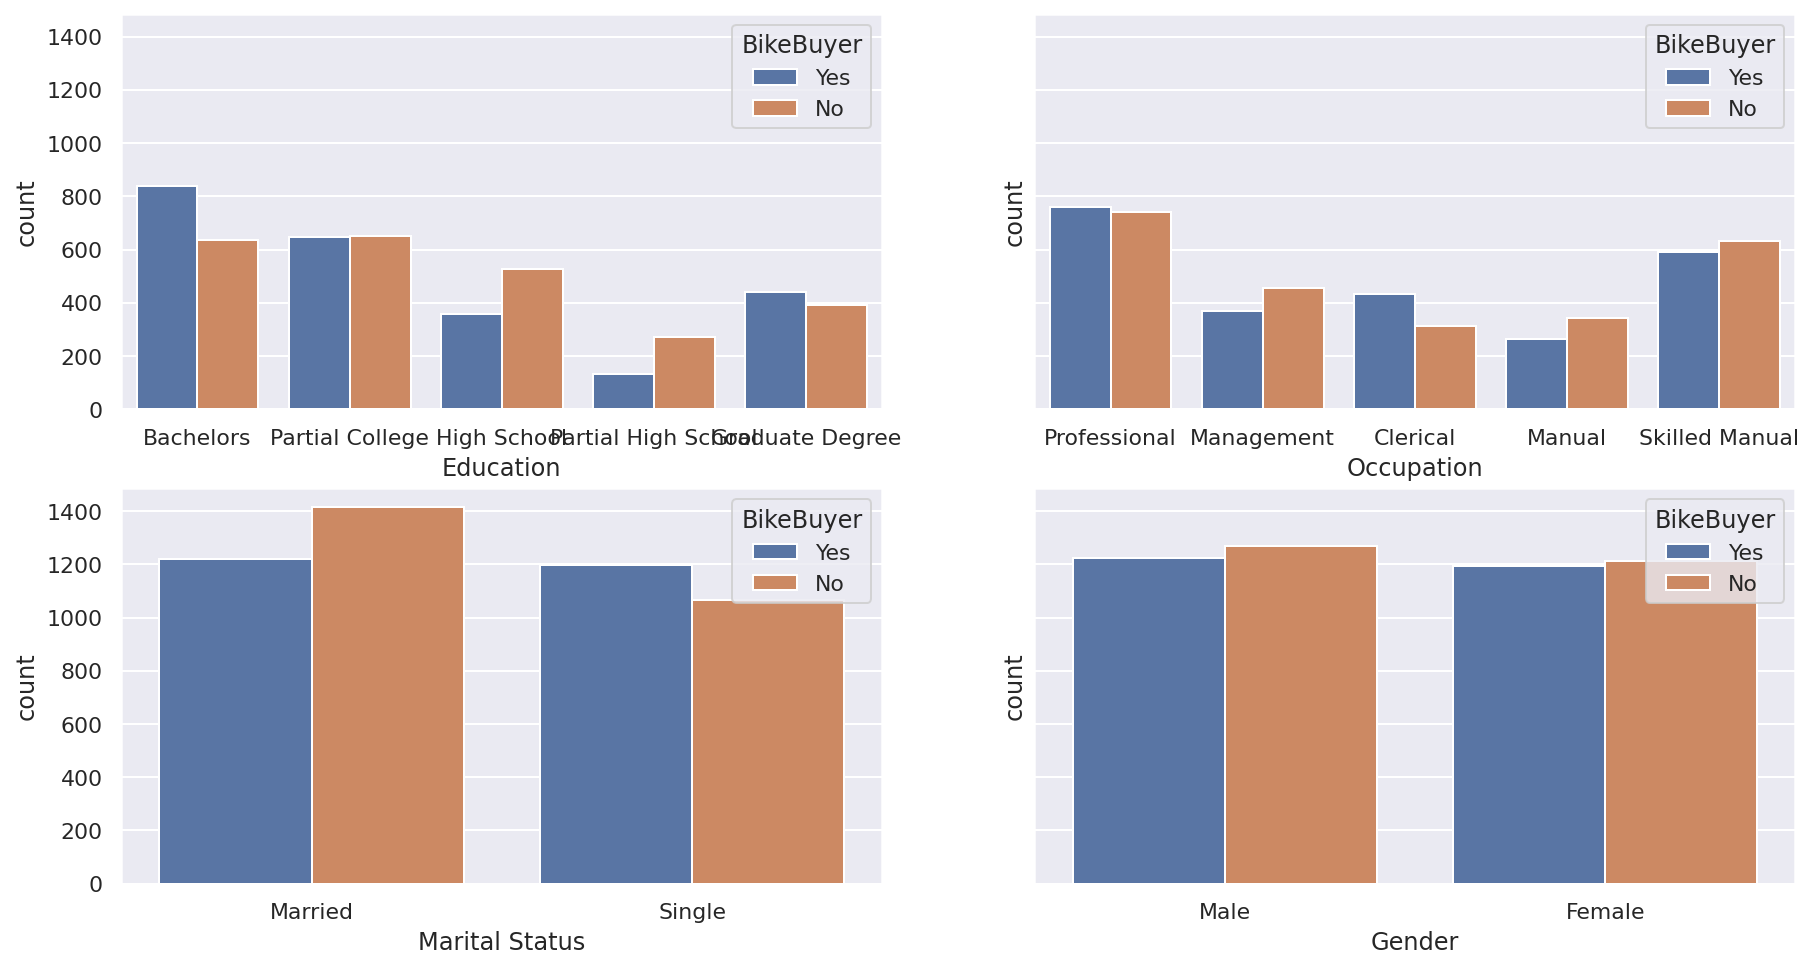

In [27]:
# trying to find dependencies between target variable and some binary variables
_, axes = plt.subplots(2, 2, sharey=True, figsize=(15, 8))

sns.countplot(x="Education", hue='BikeBuyer', data=historical_df,ax=axes[0][0])
sns.countplot(x="Occupation", hue='BikeBuyer', data=historical_df,ax=axes[0][1])
sns.countplot(x="Marital Status", hue='BikeBuyer', data=historical_df,ax=axes[1][0])
sns.countplot(x="Gender", hue='BikeBuyer', data=historical_df,ax=axes[1][1])


In [28]:
historical_df.head()

,Marital Status,Gender,Income,Children,Education,Occupation,HomeOwner,Number of cars,CommuteDistance,Age,BikeBuyer
CustomerKey,,,,,,,,,,,
11000,Married,Male,90000,2,Bachelors,Professional,Yes,0,1-2 Miles,40,Yes
11001,Single,Male,60000,3,Bachelors,Professional,No,1,0-1 Miles,41,Yes
29004,Married,Male,70000,4,Bachelors,Management,Yes,2,10+ Miles,57,Yes
25562,Married,Female,20000,0,Bachelors,Clerical,Yes,0,0-1 Miles,27,Yes
18839,Married,Male,80000,3,Partial College,Professional,Yes,1,1-2 Miles,51,Yes


In [29]:
historical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4897 entries, 11000 to 19723
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Marital Status   4897 non-null   object
 1   Gender           4897 non-null   object
 2   Income           4897 non-null   int64 
 3   Children         4897 non-null   int64 
 4   Education        4897 non-null   object
 5   Occupation       4897 non-null   object
 6   HomeOwner        4897 non-null   object
 7   Number of cars   4897 non-null   int64 
 8   CommuteDistance  4897 non-null   object
 9   Age              4897 non-null   int64 
 10  BikeBuyer        4897 non-null   object
dtypes: int64(4), object(7)
memory usage: 619.1+ KB


In [30]:
# convert yes/no string variables into numerical values
map_dict = {"No": 0, "Yes": 1}
historical_df['BikeBuyer'] = historical_df['BikeBuyer'].map(map_dict)
historical_df['HomeOwner'] = historical_df['HomeOwner'].map(map_dict)
potential_df['HomeOwner'] = potential_df['HomeOwner'].map(map_dict)
historical_df.head()

,Marital Status,Gender,Income,Children,Education,Occupation,HomeOwner,Number of cars,CommuteDistance,Age,BikeBuyer
CustomerKey,,,,,,,,,,,
11000,Married,Male,90000,2,Bachelors,Professional,1,0,1-2 Miles,40,1
11001,Single,Male,60000,3,Bachelors,Professional,0,1,0-1 Miles,41,1
29004,Married,Male,70000,4,Bachelors,Management,1,2,10+ Miles,57,1
25562,Married,Female,20000,0,Bachelors,Clerical,1,0,0-1 Miles,27,1
18839,Married,Male,80000,3,Partial College,Professional,1,1,1-2 Miles,51,1


In [31]:
potential_df.head()

,Marital Status,Gender,Income,Children,Education,Occupation,HomeOwner,Number of cars,CommuteDistance,Age
CustomerKey,,,,,,,,,,
11000,Married,Male,90000,2,Bachelors,Professional,1,0,1-2 Miles,40
11001,Single,Male,60000,3,Bachelors,Professional,0,1,0-1 Miles,41
11002,Married,Male,60000,3,Bachelors,Professional,1,1,2-5 Miles,41
11003,Single,Female,70000,0,Bachelors,Professional,0,1,5-10 Miles,38
11004,Single,Female,80000,5,Bachelors,Professional,1,4,1-2 Miles,38


In [32]:
historical_df.dtypes

Marital Status     object
Gender             object
Income              int64
Children            int64
Education          object
Occupation         object
HomeOwner           int64
Number of cars      int64
CommuteDistance    object
Age                 int64
BikeBuyer           int64
dtype: object

### Prepare data for machine learning

In [33]:
# split dataset into X and y 
historical_y = historical_df['BikeBuyer'].astype('int')
historical_x = historical_df.drop('BikeBuyer', axis = 1)

In [34]:
historical_y.shape

(4897,)

In [35]:
historical_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4897 entries, 11000 to 19723
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Marital Status   4897 non-null   object
 1   Gender           4897 non-null   object
 2   Income           4897 non-null   int64 
 3   Children         4897 non-null   int64 
 4   Education        4897 non-null   object
 5   Occupation       4897 non-null   object
 6   HomeOwner        4897 non-null   int64 
 7   Number of cars   4897 non-null   int64 
 8   CommuteDistance  4897 non-null   object
 9   Age              4897 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 580.8+ KB


In [36]:
potential_df.shape

(18484, 10)

In [37]:
# fill missing data
#If we loop through categorical columns do we go through all the columns of historical_x?
#why do we take the row number 0 only, why is it fixed, how does it go through all the rows?
for c in categorical_columns:
    if c in historical_x.columns:
        historical_x[c].fillna(historical_x[c].mode()[0], inplace=True)
    if c in potential_df.columns:
        potential_df[c].fillna(potential_df[c].mode()[0], inplace=True)
    
for c in numerical_columns:
    if c in historical_x.columns:
        historical_x[c].fillna(historical_x[c].median(), inplace=True)
    if c in potential_df.columns:
        potential_df[c].fillna(potential_df[c].median(), inplace=True)

In [38]:
# encoding variables for decision trees algorithms ex. one-hot-encoding
historical_x = pd.concat([historical_x[numerical_columns],
    pd.get_dummies(historical_x[categorical_columns])], axis=1)
potential_df = pd.concat([potential_df[numerical_columns],
    pd.get_dummies(potential_df[categorical_columns])], axis=1)

In [39]:
historical_x.head()

,Income,Children,Number of cars,Age,HomeOwner,Marital Status_Married,Marital Status_Single,Gender_Female,Gender_Male,Education_Bachelors,...,Occupation_Clerical,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,CommuteDistance_0-1 Miles,CommuteDistance_1-2 Miles,CommuteDistance_10+ Miles,CommuteDistance_2-5 Miles,CommuteDistance_5-10 Miles
CustomerKey,,,,,,,,,,,,,,,,,,,,,
11000,90000,2,0,40,1,1,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0
11001,60000,3,1,41,0,0,1,0,1,1,...,0,0,0,1,0,1,0,0,0,0
29004,70000,4,2,57,1,1,0,0,1,1,...,0,1,0,0,0,0,0,1,0,0
25562,20000,0,0,27,1,1,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
18839,80000,3,1,51,1,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [40]:
potential_df.head()

,Income,Children,Number of cars,Age,HomeOwner,Marital Status_Married,Marital Status_Single,Gender_Female,Gender_Male,Education_Bachelors,...,Occupation_Clerical,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,CommuteDistance_0-1 Miles,CommuteDistance_1-2 Miles,CommuteDistance_10+ Miles,CommuteDistance_2-5 Miles,CommuteDistance_5-10 Miles
CustomerKey,,,,,,,,,,,,,,,,,,,,,
11000,90000,2,0,40,1,1,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0
11001,60000,3,1,41,0,0,1,0,1,1,...,0,0,0,1,0,1,0,0,0,0
11002,60000,3,1,41,1,1,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
11003,70000,0,1,38,0,0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,1
11004,80000,5,4,38,1,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0


In [41]:
historical_x.shape

(4897, 24)

In [42]:
potential_df.shape

(18484, 24)

### Split data into training and testing datasets

In [43]:
# split data into train and validation part
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(historical_x,historical_y,test_size=0.3, random_state=17)

In [44]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Train Machine Learning (ML) model

In [45]:
tree = DecisionTreeClassifier(max_depth=3, random_state=17)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=17)

### Analyze model results

In [46]:
tree_predictions = tree.predict(X_valid)  
accuracy_score(y_valid, tree_predictions)

0.6238095238095238

In [47]:
%%time
tree_params = {'max_depth': range(2, 11)}

locally_best_tree = GridSearchCV(DecisionTreeClassifier(random_state=17),
                                 tree_params, cv=5)                  

locally_best_tree.fit(historical_x, historical_y)
print("Best params:", locally_best_tree.best_params_)
print("Best cross validaton score", locally_best_tree.best_score_)

Best params: {'max_depth': 8}
Best cross validaton score 0.7079925371578663
CPU times: user 484 ms, sys: 0 ns, total: 484 ms
Wall time: 484 ms


In [48]:
tuned_tree = DecisionTreeClassifier(max_depth=8, random_state=17)
tuned_tree.fit(X_train, y_train)
tuned_tree_predictions = tuned_tree.predict(X_valid)
accuracy_score(y_valid, tuned_tree_predictions)

0.6850340136054421

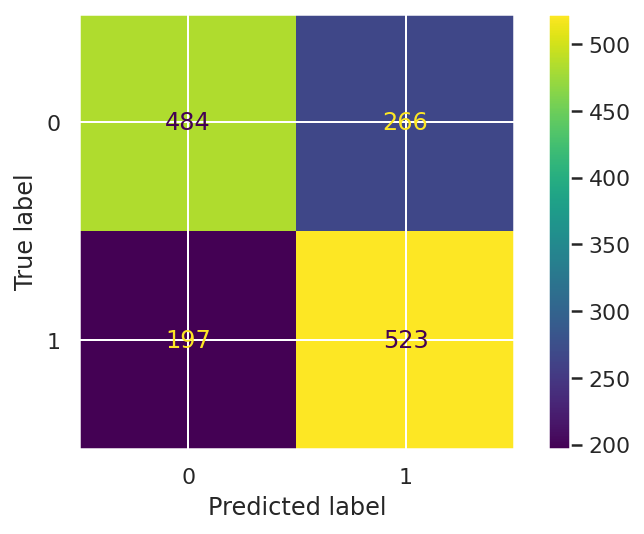

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_valid, tuned_tree_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [50]:
from sklearn.tree import export_graphviz

In [51]:
export_graphviz(tuned_tree, out_file='bike_tree.dot',
                feature_names=X_train.columns, filled = True, max_depth=8)

In [52]:
!dot -Tpng bike_tree.dot -o bike_tree.png

In [53]:
!ls -l

total 10308
-rw-rw-rw- 1 jovyan users   34163 Oct  5 15:47  bike_tree.dot
-rw-rw-rw- 1 jovyan users 2193149 Oct  5 15:47  bike_tree.png
-rw-rw-rw- 1 jovyan users    5411 Oct  5 15:28  bike_tree_pruned.dot
-rw-rw-rw- 1 jovyan users  330307 Oct  5 15:28  bike_tree_pruned.png
-rw-rw-rw- 1 jovyan users   27664 Sep 20 05:23  boxplot.png
drwxrwxrwx 2 root   root     4096 Oct  5 15:25  __DATA
-rw-rw-rw- 1 jovyan users 5803520 Sep 20 05:04 'Historic Customer Data.xls'
-rw-rw-r-- 1 jovyan users  176237 Oct  3 09:02  lab2-argyropoulos.ipynb
-rw-rw-r-- 1 jovyan users  987184 Oct  5 15:45  lab3-argyropoulos.ipynb
-rw-rw-r-- 1 jovyan users  195070 Oct  3 09:08  lab4-argyropoulos.ipynb
-rw-rw-r-- 1 jovyan users   56444 Sep 18 12:59  Lecture-1.ipynb
-rw-rw-r-- 1 jovyan users  663894 Sep 18 13:01  Lecture-2.ipynb
-rw-rw-r-- 1 jovyan users   26996 Oct  3 09:02  Lecture-3.ipynb
drwxrws--- 2 root   users   16384 Jun 18 11:55  lost+found
drwxrwsr-x 6 jovyan users    4096 Oct  5 15:25  __MANUAL
drwxrwxrwx 

<img src='bike_tree.png'>

In [54]:
export_graphviz(tuned_tree, out_file='bike_tree_pruned.dot',
                feature_names=X_train.columns, filled = True, max_depth=4)
!dot -Tpng bike_tree_pruned.dot -o bike_tree_pruned.png

<img src='bike_tree_pruned.png'>

### Self-control stop 
- Which group of potential customers are most likely to buy a bike? Prove your answer with the screenshot.
- Which group of customers is least interesting to bike sellers? Prove your answer with the screenshot.

#### potential customers likely to buy? 
The final group has a good proportion of gini and a high division: 
- less than 1  car  
- Has less than 3 children  
- Has Bachelors or higher education  
- Income is more than 15k but less than 55k  
- Age is less than 49  
- Occupation clerical > 0.5  

Same goes for least promising group: it's with gini = 0.044, and division of 43/1.  
- Less than 1 car  
- More then 3 children  
- Older then 40  
- No clerical occupation  
- Commute distance less then 10 miles   
- Partial High School   
- No degree  
- Single  
#### least interesting customer?
more than 1.5 cars, more than 3.5 kids, age more than 40.5, office job

In [55]:
#calculating tree probabilities
probs = tuned_tree.predict_proba(X_valid)

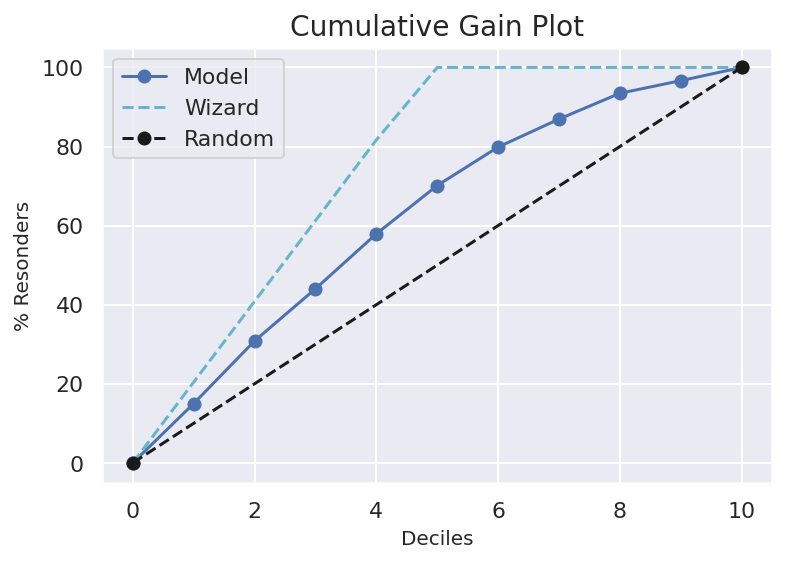

In [56]:
# CUMMULATIVE GAIN PLOT
import kds
kds.metrics.plot_cumulative_gain(y_valid, probs[:,1])

In [106]:
from sklearn.linear_model import LogisticRegression

clf_glm = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg').fit(X_train, y_train)

prob_glm = clf_glm.predict_proba(X_valid)

max_prob_glm = round(pd.DataFrame(np.amax(prob_glm, axis=1), columns = ['prob_glm']),2)

max_prob_glm['Decile_rank_glm'] = pd.cut(max_prob_glm['prob_glm'], 10, labels = np.arange(10,0, -1))

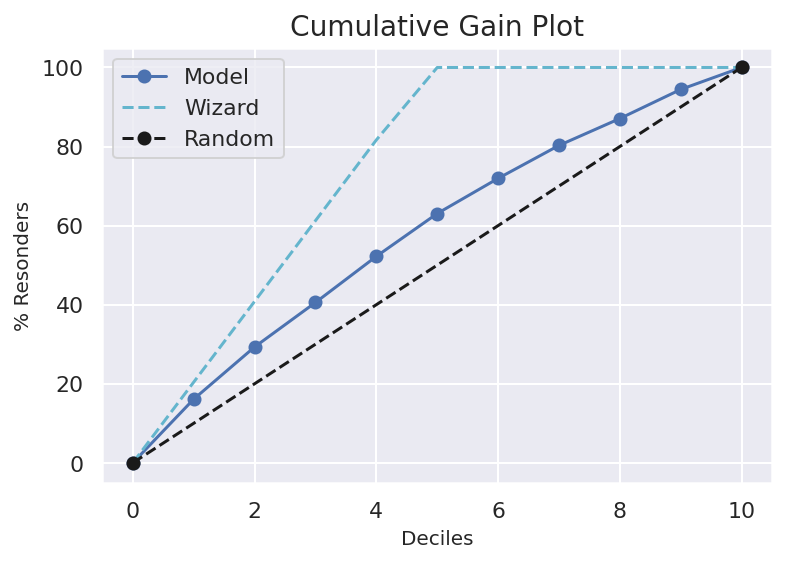

In [110]:
kds.metrics.plot_cumulative_gain(y_valid.to_numpy(), prob_glm[:,1])

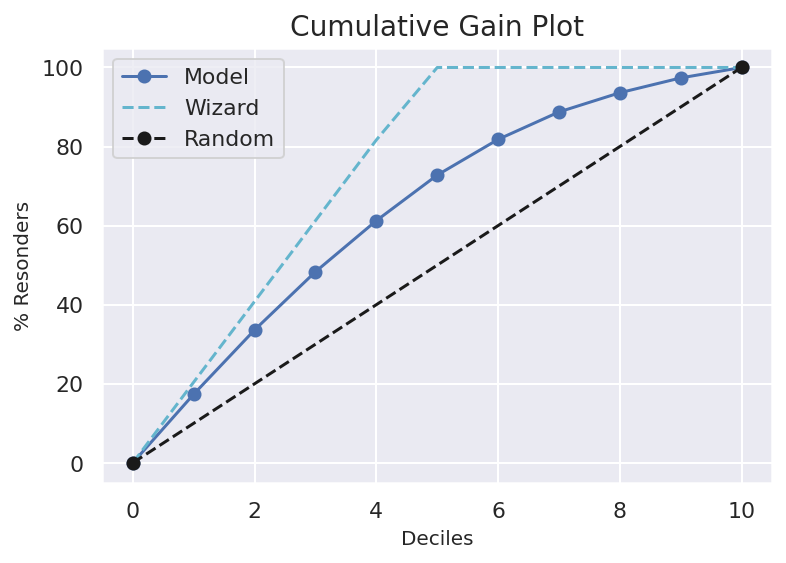

In [112]:
clf_rf = RandomForestClassifier().fit(X_train, y_train)
prob_rf = clf_rf.predict_proba(X_valid)
max_prob_rf = pd.DataFrame(np.amax(prob_rf, axis=1), columns = ['prob_rf'])
max_prob_rf['Decile_rank_rf'] = pd.cut(max_prob_rf['prob_rf'], 10, labels = np.arange(10,0, -1))
kds.metrics.plot_cumulative_gain(y_valid.to_numpy(), prob_rf[:,1])

### Self-control stop 
- Explain accuracy chart and meaning of the models, presented on it

#### Accuracy chart and explanation
The cumulative gain plot shows how our baseline model, the decision tree classifier, performs against two other regression models, wizard and random. It assess the performance of the model by comparing it with the random pick or a model that 100% fits the data (overfitting and therefore cannot be used for another dataset).
Our model performs slightly better than a random model, however our trained model does not predict a higher proportion of the target class in the validation subsample. Around 60% of our observation that a high probability of around 80% of our target class is located.
If we can target 50% of observation, our model ensures that 70% of bike buyers are in this group, compared to 50% in a random attribution (e.g. we decide to target every 5th person with the name that ends by S). 
The wizard model shows that the majority of our bike buyers are located in the first 5 deciles (50%).

GridsearchCV improved the baseline model by 7% more.

https://www.analyticsvidhya.com/blog/2021/09/how-to-evaluate-the-business-value-of-ml-model/

## Let's build a profit chart for our model

In [57]:
potential_predictions = tuned_tree.predict(potential_df)
potential_probs = tuned_tree.predict_proba(potential_df)

In [58]:
type(tuned_tree)

sklearn.tree._classes.DecisionTreeClassifier

In [59]:
type(potential_predictions)

numpy.ndarray

In [60]:
potential_predictions

array([1, 1, 0, ..., 1, 1, 1])

In [61]:
potential_probs.shape

(18484, 2)

In [62]:
potential_probs

array([[0.        , 1.        ],
       [0.21818182, 0.78181818],
       [0.84615385, 0.15384615],
       ...,
       [0.21031746, 0.78968254],
       [0.07526882, 0.92473118],
       [0.07526882, 0.92473118]])

In [63]:
potential_df['probability'] = potential_probs[:,1]

In [64]:
potential_df['result'] = potential_predictions

In [86]:
potential_df.sort_values(by = 'probability', ascending=False, inplace=True)

In [87]:
potential_df['revenue'] = potential_df['probability']*30
potential_df.head(6000)

,Income,Children,Number of cars,Age,HomeOwner,Marital Status_Married,Marital Status_Single,Gender_Female,Gender_Male,Education_Bachelors,...,Occupation_Professional,Occupation_Skilled Manual,CommuteDistance_0-1 Miles,CommuteDistance_1-2 Miles,CommuteDistance_10+ Miles,CommuteDistance_2-5 Miles,CommuteDistance_5-10 Miles,probability,result,revenue
CustomerKey,,,,,,,,,,,,,,,,,,,,,
11000,90000,2,0,40,1,1,0,0,1,1,...,1,0,0,1,0,0,0,1.000000,1,30.000000
18158,90000,4,1,53,1,1,0,0,1,0,...,1,0,0,0,1,0,0,1.000000,1,30.000000
17700,10000,0,0,33,1,0,1,0,1,0,...,0,0,1,0,0,0,0,1.000000,1,30.000000
17913,10000,1,0,30,0,0,1,1,0,0,...,0,0,0,1,0,0,0,1.000000,1,30.000000
18147,170000,3,3,61,1,1,0,1,0,1,...,0,0,1,0,0,0,0,1.000000,1,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20557,120000,3,4,50,1,1,0,1,0,0,...,1,0,0,0,0,0,1,0.647059,1,19.411765
20556,120000,3,4,49,1,1,0,0,1,0,...,1,0,0,0,0,0,1,0.647059,1,19.411765
13251,130000,2,4,48,1,1,0,0,1,0,...,1,0,0,0,0,0,1,0.647059,1,19.411765


In [92]:
def max_revenue(a,b):
    base_cost = -5000 
    costs0_1000 = -25
    costs1001_5000 = -20
    costs_more_5000 = -15
    potential_df['revenue'] = potential_df['probability']*b
    model_points = [] 

    for i in range(len(potential_df)):
        unit_cost = 0
        if i < 1001: 
            unit_cost = costs0_1000
        elif i < 5001:
            unit_cost = costs1001_5000
        else : 
            unit_cost = costs_more_5000
        revenue = potential_df['revenue'].iloc[:i].sum() 
        model_result = base_cost + unit_cost*i + revenue
        
        model_points.append(model_result)
    print("sample size: ", len(potential_df))
    print("Highest point: ",model_points.index(max(model_points)))
    print("Max revenue: ",round(max(model_points),2))
    print("Percentage of the population: ",round(model_points.index(max(model_points))/len(potential_df)*100,2),"%")
    plt.plot(model_points)
    plt.show()

sample size:  18484
Highest point:  9877
Max revenue:  64366.52
Percentage of the population:  53.44 %


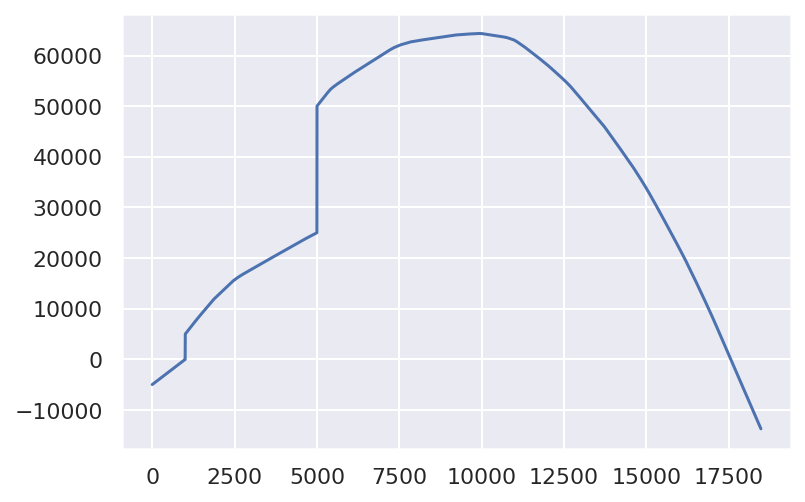

In [93]:
max_revenue(potential_df,30)

sample size:  18484
Highest point:  10770
Max revenue:  101913.54
Percentage of the population:  58.27 %


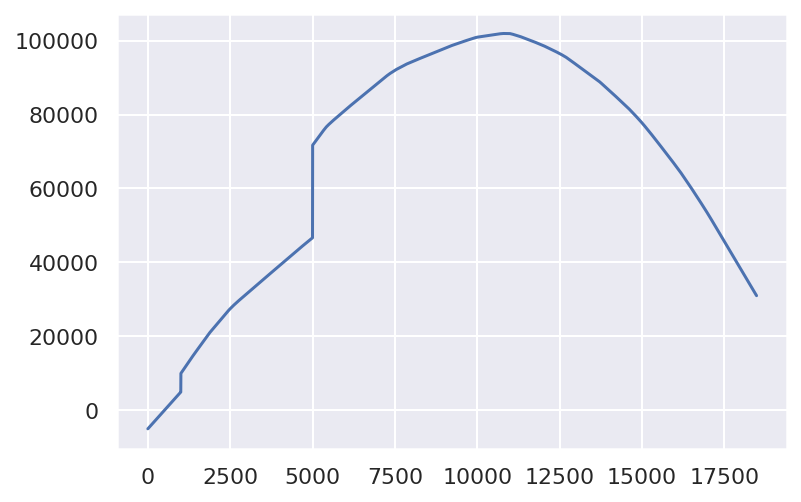

In [95]:
max_revenue(potential_df,35)

sample size:  18484
Highest point:  7322
Max revenue:  32130.73
Percentage of the population:  39.61 %


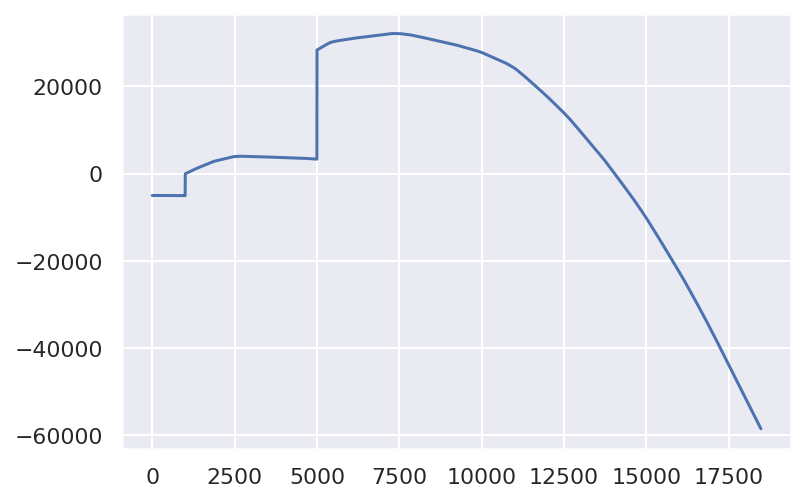

In [97]:
max_revenue(potential_df,25)

### Self-control stops

- What percentage of population should be targeted with our direct mail marketing campaign?
- What happens if we increase revenue per individual to 35 (decrease to 25)?

## In-class discussions

-	What have you learned?
-	Describe the steps of the typical data mining process based on the lab and why they’re needed.
-	Why do you need a test dataset?
-	What are the main challenges in implementing data mining in practice?
-	What to do if you don’t have historical data?
-	Make a guess about how decision trees work.
-	How you can apply new knowledge in planning marketing campaigns?
